

### Introduction to Computer Vision (Fall 2022)
Instructor: Muhammad Fahim \\
TA: Batul Yaseen, Karam Almaghout


### Acknowledgement
This lab was maintained by Rauf, Marcus, Rufina, Alex, Batul, Karam and Fahim \\



## Lab 10. Face detection

## Lab tasks 

#### Apply Viola Jones Algorithm to detect human faces in the image. The result should look like this:
![](https://i.imgur.com/r9wLclq.png)

#### Apply Viola Jones Algorithm to detect cat faces in the image. The result should look like this:
![](https://i.imgur.com/nSLRiKb.png)

#### Replace human faces with cat faces:
![](https://i.imgur.com/SIRQi6M.png)

#### Apply deep learning to face detection:
![](https://i.imgur.com/qQZoXvN.png)

#### Apply any of these algorithms to detect faces on each frame of the video and if there are more than two faces swap them between each other. You will get something like this but on a video:
![](https://i.imgur.com/shTuXvS.png)

## Algorithms for face detection

### Viola Jones using OpenCV
```
# use haarcascade_frontalface_default.xml to detect people's faces
# use haarcascade_frontalcatface.xml to detect cat's faces

  face_cascade_pulp = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  print(face_cascade_pulp)
  start = time.time()
  faces = face_cascade_pulp.detectMultiScale(img_pulp)
  print(f'time taken: {time.time()-start}')
  print(len(faces))
  for (x,y,w,h) in faces:
      cv2.rectangle(img_pulp_copy,(x,y),(x+w,y+h),(255,0,0),4)
          
  showInRow([img_pulp_copy])
```
Viola Jones explained: [link](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html)

### Face Detection in OpenCV Using Deep Learning
Using a pretrained neural network
```
  net = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt', 'res10_300x300_ssd_iter_140000.caffemodel')
  confidence = 0.5

  (h, w) = image.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0), swapRB = False)
      
  net.setInput(blob)
  detections = net.forward()

  # filter out weak detections
  for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > 0.5:
      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
      (startX, startY, endX, endY) = box.astype("int")

      cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
```

## Import libaries

In [1]:
import cv2
import time
import numpy as np
from IPython.display import clear_output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)

### Download images

In [2]:
!wget https://avatars.mds.yandex.net/get-kinopoisk-post-img/1642096/6a983456f20bd5c47db18643146cd8e7/960x540 -O pulp.jpg
!wget https://vignette.wikia.nocookie.net/houseofnight/images/8/8b/Cats.jpg/revision/latest?cb=20130812053537 -O cats.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/raw/d0c95c6b3ed54dbb1c6eb7117a8202357617af24/okgo2.mp4?raw=true -O vid.mp4
clear_output()
print('Download completed!')

Download completed!


### Helper functions

In [3]:
 def read_and_resize_image(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    img_result = cv2.resize(img_result, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    return img_result
  
def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()
  

def process_video(video_path, frame_process):
  vid = cv2.VideoCapture(video_path)
  try:
    while(True):
      ret, frame = vid.read()
      if not ret:
        vid.release()
        break
        
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

      if frame_process is not None:
        frame = frame_process(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        out.write(frame)
             
  except KeyboardInterrupt:
    vid.release()
    

## Perform Viola Jones algorithm

In [4]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalcatface.xml
clear_output()
print('Download completed!')

Download completed!


## Open and display image

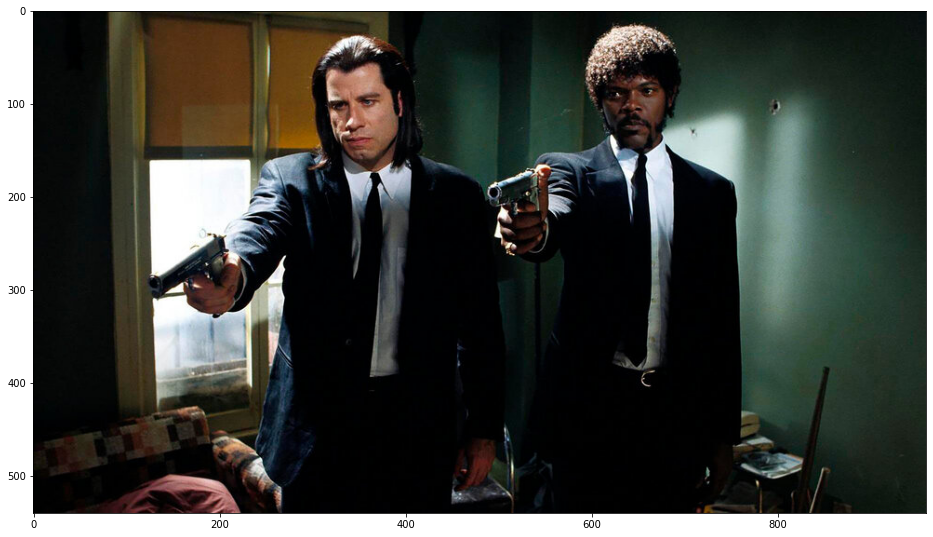

In [5]:
img_pulp = read_and_resize_image('pulp.jpg', grayscale = False, fx=1, fy=1)
showInRow([img_pulp])

## Find faces and draw rectangles around them

< cv2.CascadeClassifier 0x7f761a46f810>
time taken: 0.6881368160247803
2


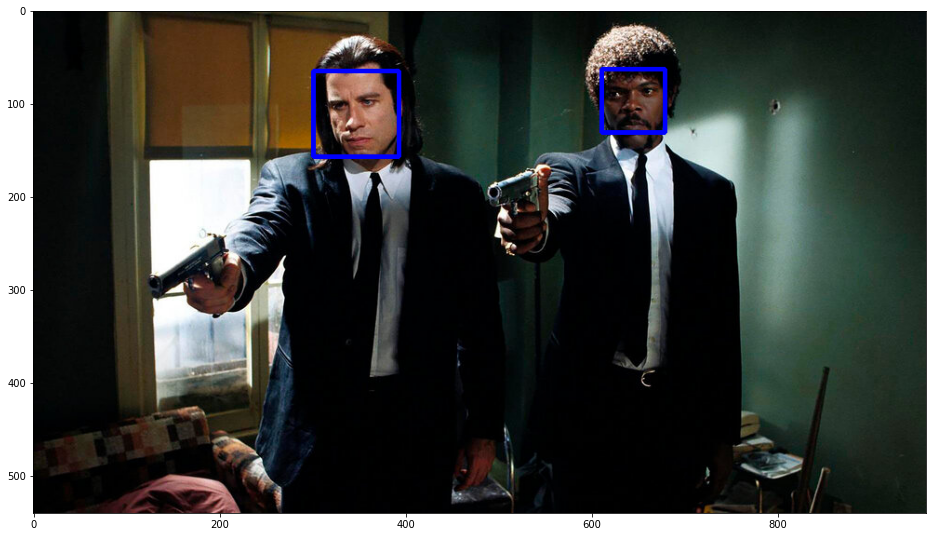

In [6]:
img_pulp_copy = img_pulp.copy()


face_cascade_pulp = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
print(face_cascade_pulp)
start = time.time()
faces = face_cascade_pulp.detectMultiScale(img_pulp)
print(f'time taken: {time.time()-start}')
print(len(faces))
for (x,y,w,h) in faces:
    cv2.rectangle(img_pulp_copy,(x,y),(x+w,y+h),(0,0,255),4)
        
showInRow([img_pulp_copy])

## Same for cats

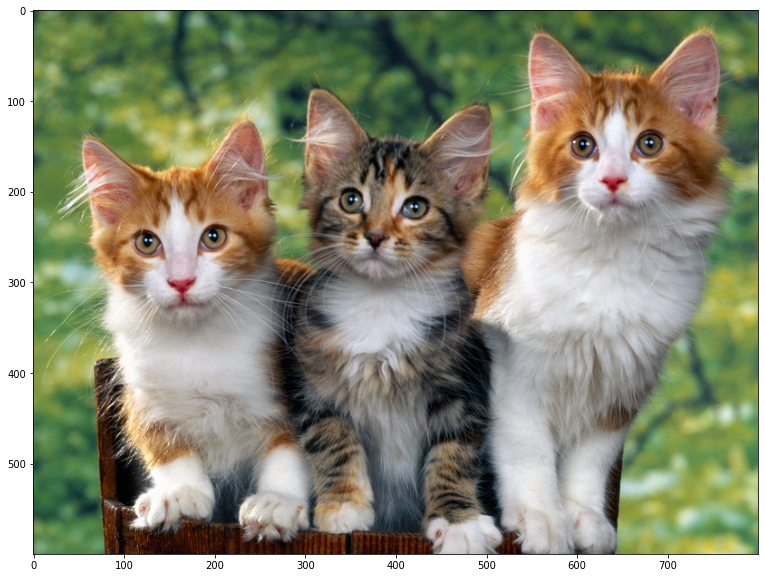

In [7]:
img_cats = read_and_resize_image('cats.jpg', grayscale = False, fx= 0.5, fy=0.5)
showInRow([img_cats])

3


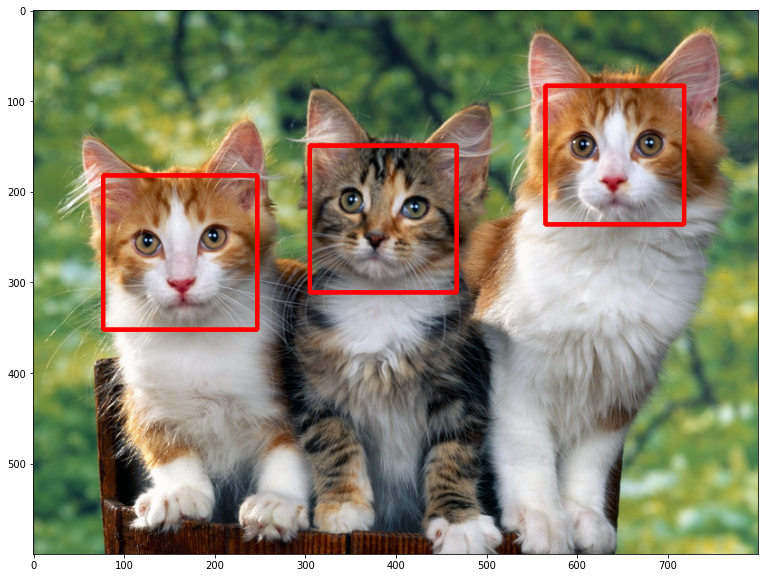

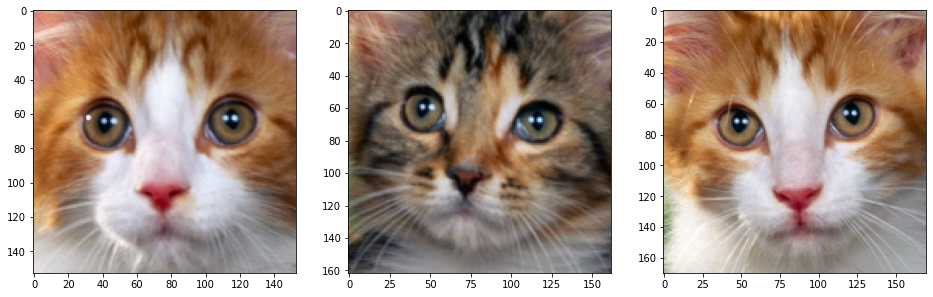

In [8]:
face_cascade_cats = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')

cat_faces_positions = face_cascade_cats.detectMultiScale(img_cats)
print(len(cat_faces_positions))
cat_faces = []
for (x,y,w,h) in cat_faces_positions:
  cat_faces.append(img_cats.copy()[y:y+h, x:x+w]) 
  cv2.rectangle(img_cats,(x,y),(x+w,y+h),(255,0,0),4)
showInRow([img_cats])
showInRow(cat_faces)

## Swap human faces with cat faces

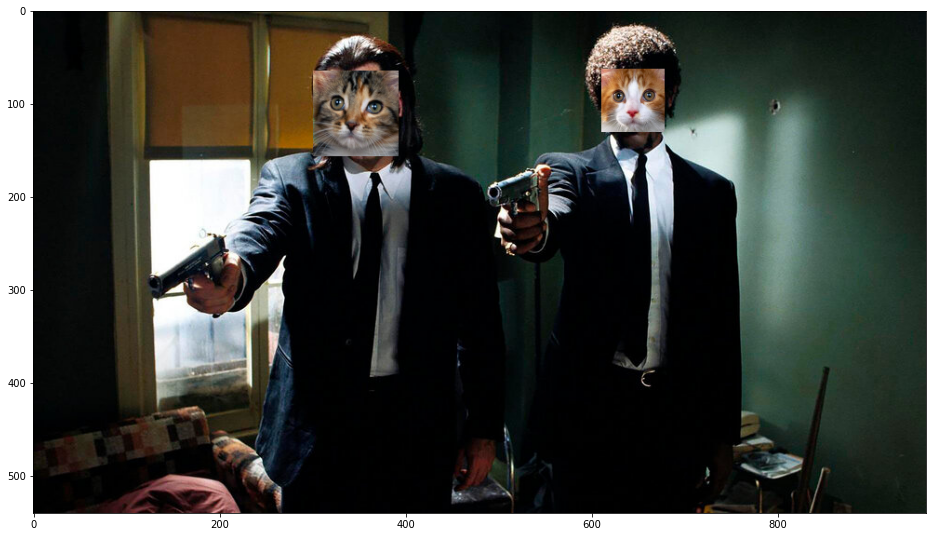

In [9]:
img_copy_pulp = img_pulp.copy()
i=0
for (x,y,w,h) in faces:
    fs = cv2.resize(cat_faces[i],(w,h))
    img_copy_pulp[y:y+h, x:x+w] = fs
    i+=1
    
showInRow([img_copy_pulp])

## Perform Neural Network Algorithm

In [13]:
!wget https://www.dropbox.com/s/p83b651l3mlot1k/deploy.prototxt.txt?dl=0 -O deploy.prototxt.txt
!wget https://www.dropbox.com/s/r9qj80jjib0a7ct/res10_300x300_ssd_iter_140000.caffemodel?dl=0 -O res10_300x300_ssd_iter_140000.caffemodel

--2022-10-31 19:36:06--  https://www.dropbox.com/s/p83b651l3mlot1k/deploy.prototxt.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/p83b651l3mlot1k/deploy.prototxt.txt [following]
--2022-10-31 19:36:06--  https://www.dropbox.com/s/raw/p83b651l3mlot1k/deploy.prototxt.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc58953a000034ea488ea96adff0.dl.dropboxusercontent.com/cd/0/inline/Bv6Tt5Sq7nI-gqSS11_i5D5RsowM5K5trJpw87DVTlDPWBY7GJOUppqaZEG_ZyNY_TXVUT48fwY_gLyq0gFIp4o-4F7Ts968CM5Ga-tVDsKm2LFHFUA2GC_ivWrygN2cACSG7pcdRfUFcTFUNArCKK9VO0p8lZMC6Sxb5mQJhk7xMQ/file# [following]
--2022-10-31 19:36:06--  https://uc58953a000034ea488ea96adff0.dl.dropboxusercontent.com/cd/0/inline/Bv6Tt5Sq7nI-gqSS11_i5D5RsowM5K5trJpw87DVTlDPWBY7GJOUpp

In [14]:
class face_detector():
  def __init__(self):
    self.net = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt', '/content/res10_300x300_ssd_iter_140000.caffemodel')
    self.confidence = 0.5
  
  def forward(self, image):
    (self.h, self.w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0), swapRB = False)
    
    self.net.setInput(blob)
    self.detections = self.net.forward()
    
  def detect(self, image):
    self.forward(image)
    for i in range(self.detections.shape[2]):
      confidence = self.detections[0, 0, i, 2]

      if confidence > 0.5:
        box = self.detections[0, 0, i, 3:7] * np.array([self.w, self.h, self.w, self.h])
        (startX, startY, endX, endY) = box.astype("int")

        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
        
    return image


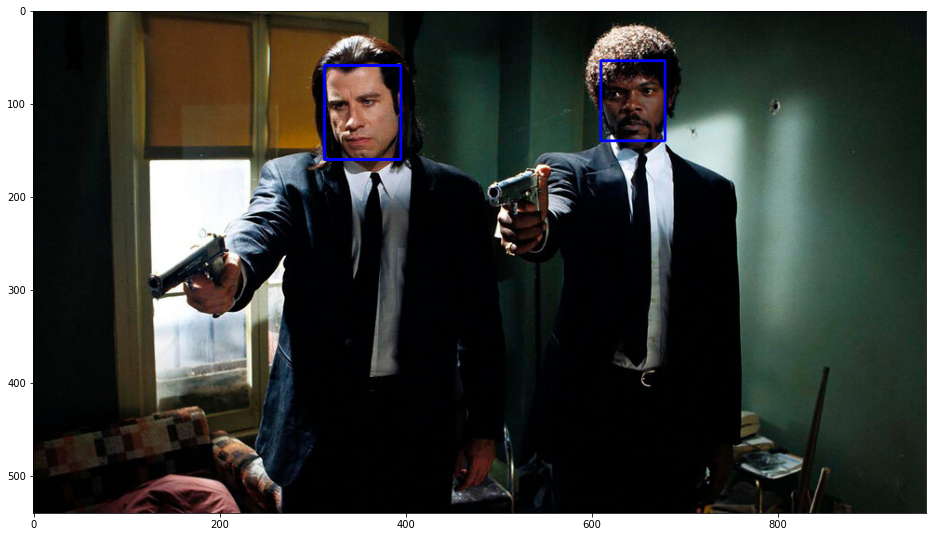

In [15]:
img_pulp = read_and_resize_image('pulp.jpg', grayscale = False, fx= 1, fy=1)

FD = face_detector()

showInRow([FD.detect(img_pulp)])

## Face detection on the video

In [16]:
class ViolaJones():
  def __init__(self):
    self.face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
    
  def detect(self, image):
    faces = self.face_cascade.detectMultiScale(image)
    if len(faces)<2:
      for (x,y,w,h) in faces:
        i = 0
        fs = cv2.resize(cat_faces[i],(w,h))
        image[y:y+h, x:x+w] = fs

    else: 
      face_imgs = [image[y:y+h, x:x+w].copy() for (x,y,w,h) in faces]
      face_imgs.reverse()
      showInRow(face_imgs)
      for i, (x,y,w,h) in enumerate(faces):
        fs = cv2.resize(face_imgs[i], (w,h))
        image[y:y+h, x:x+w] = fs
        
    return image
#       cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),4)

In [17]:
# FD = face_detector()
VJ = ViolaJones()

def detect_faces(frame) -> (np.array, list):
  return VJ.detect(frame)
  # return FD.detect(frame)

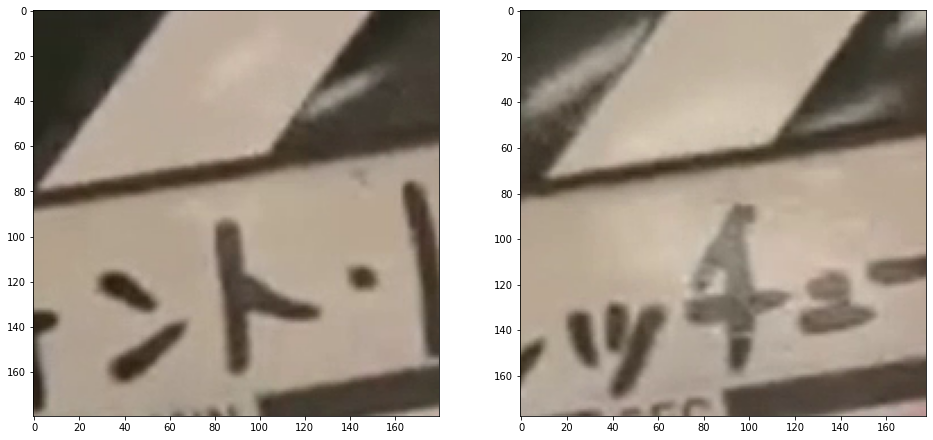

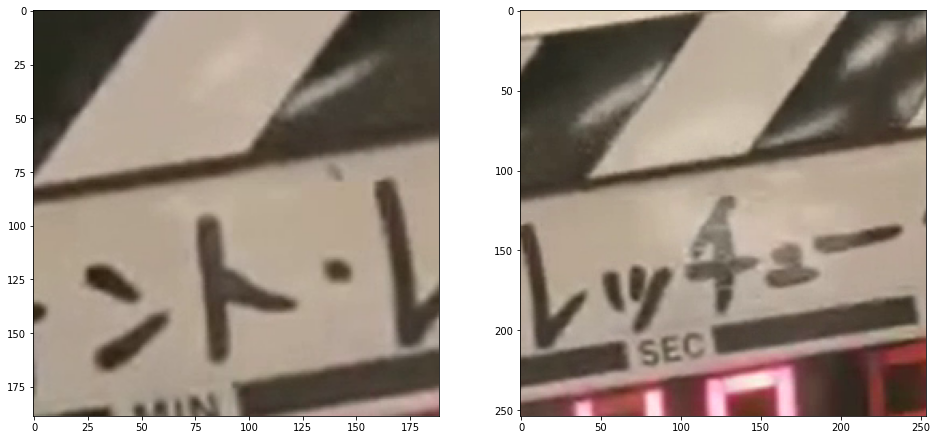

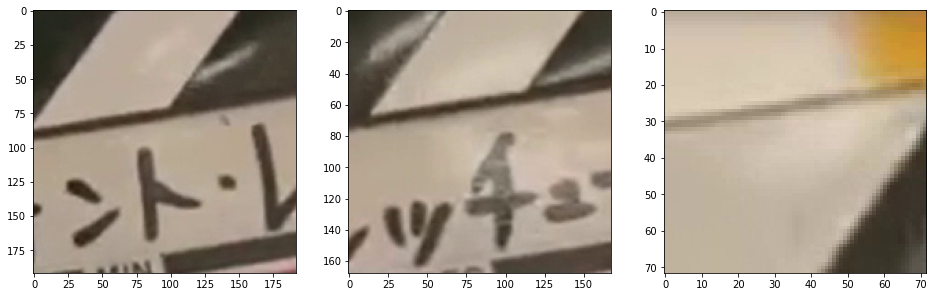

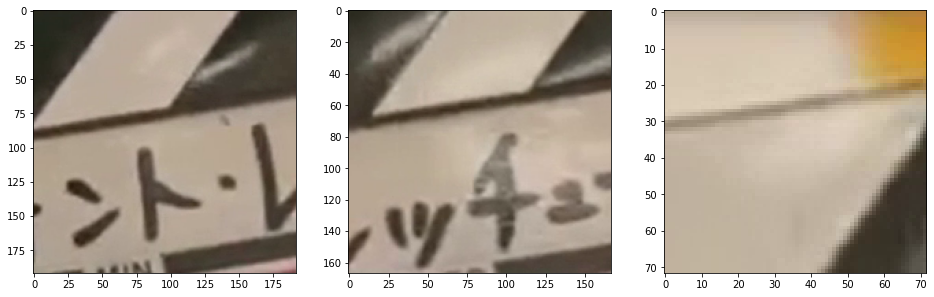

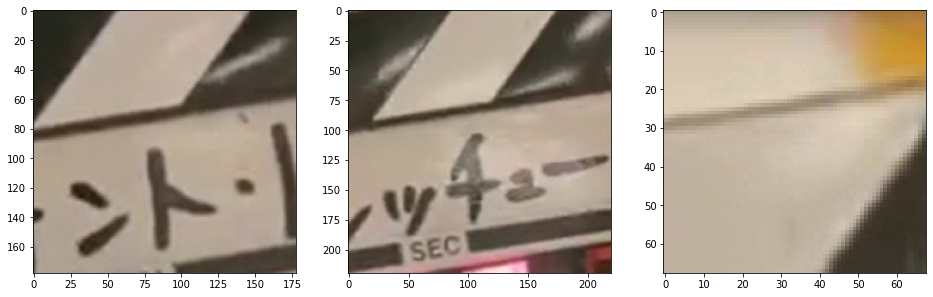

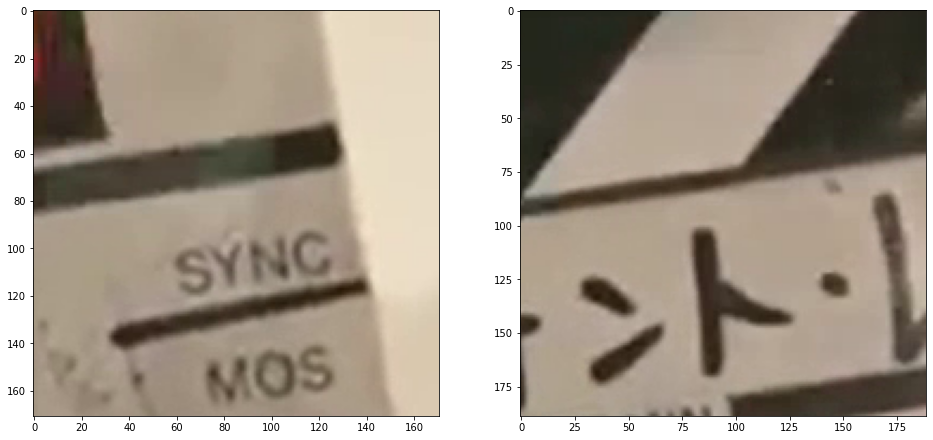

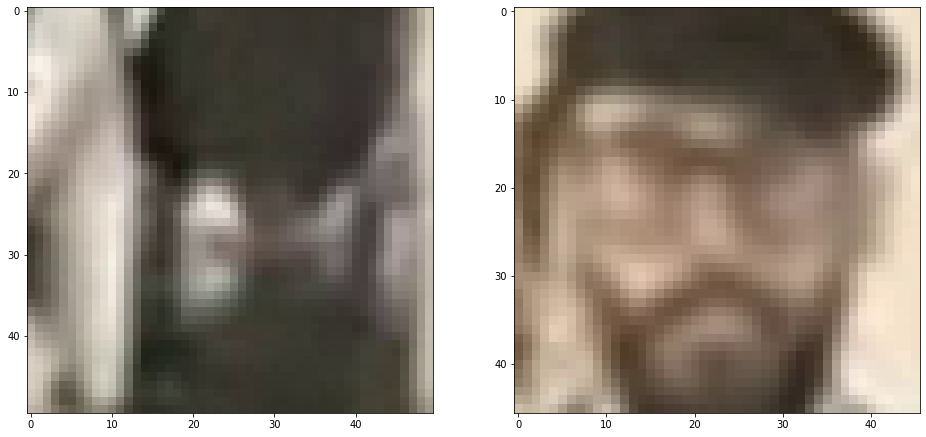

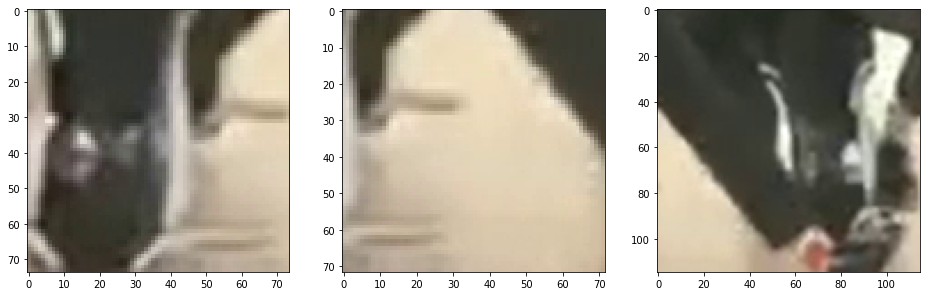

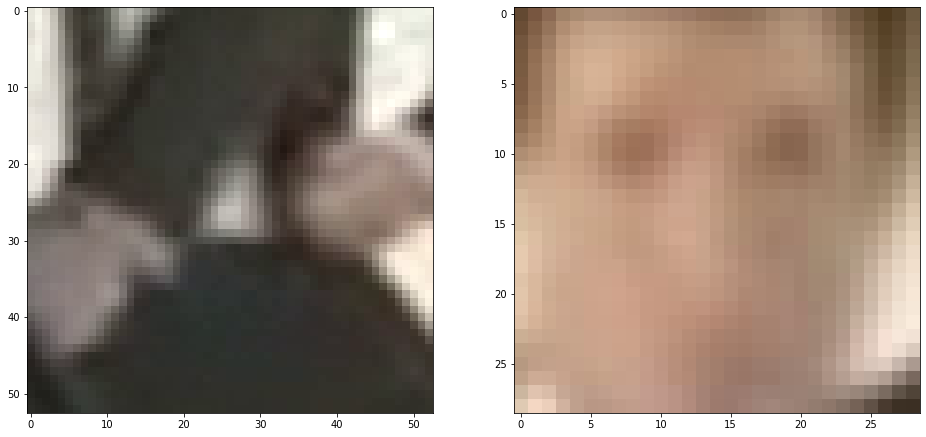

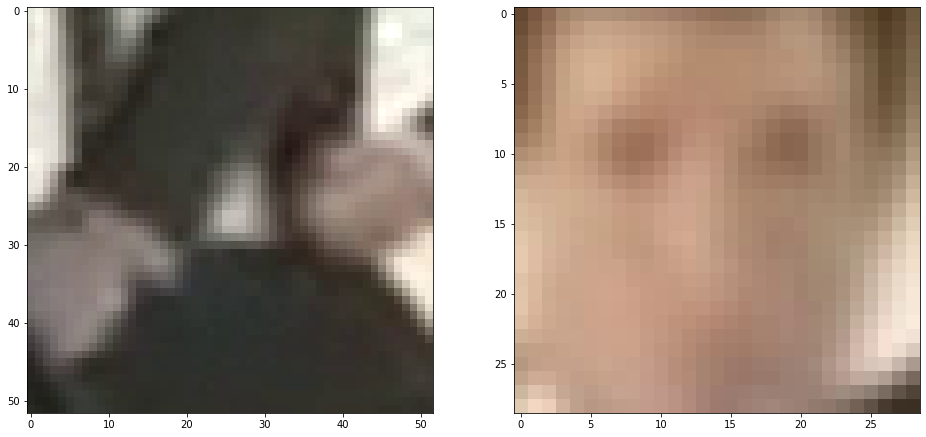

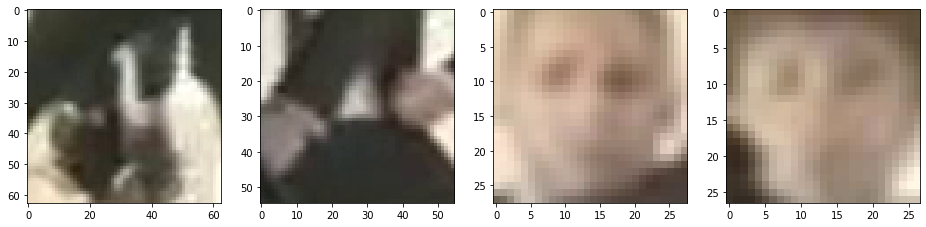

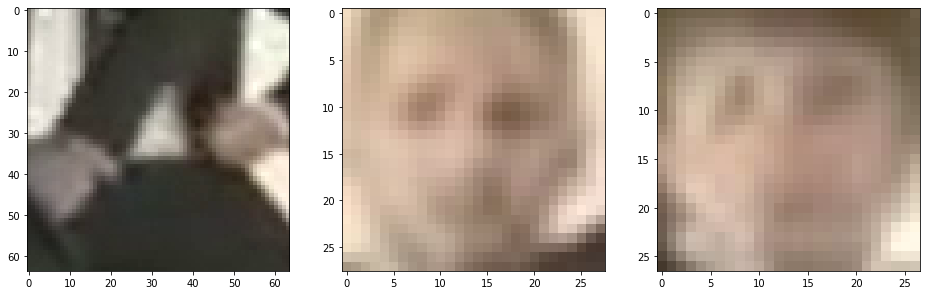

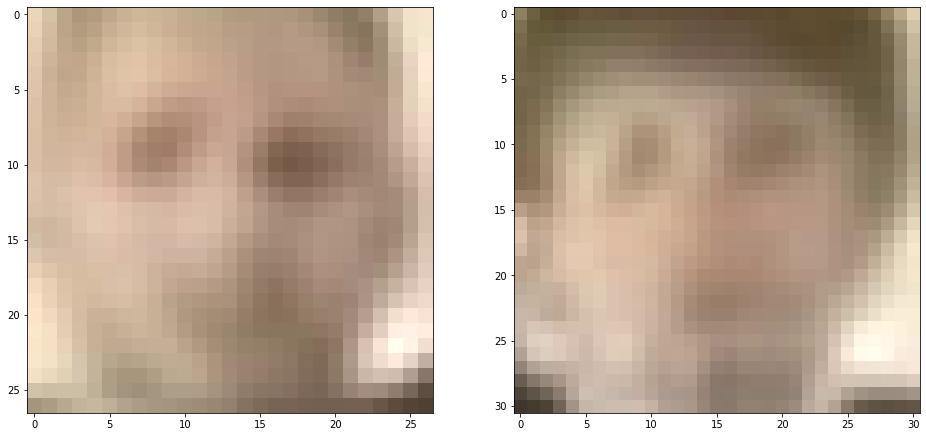

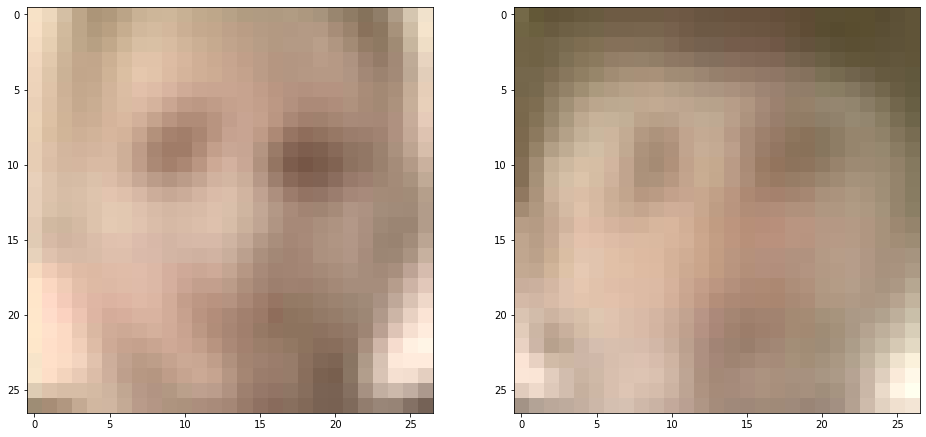

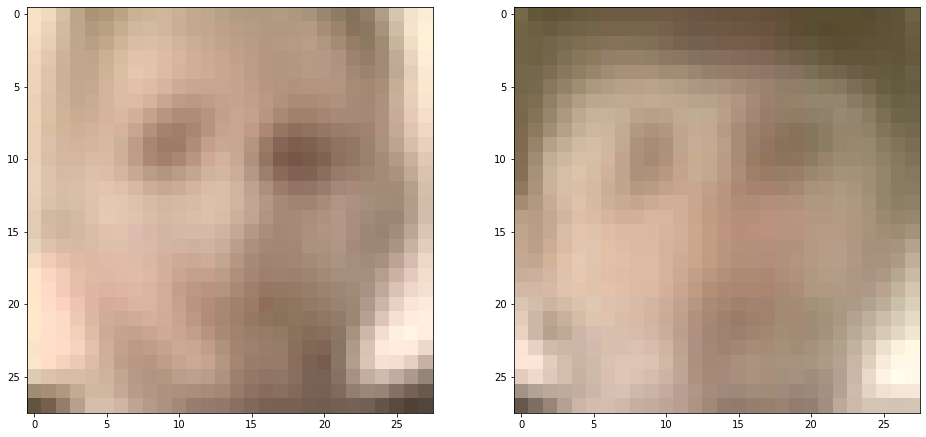

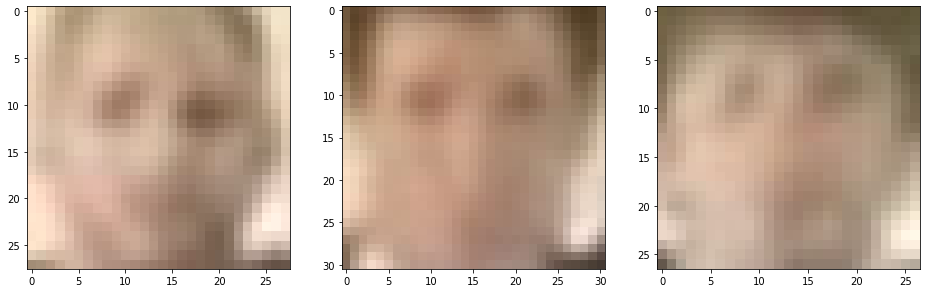

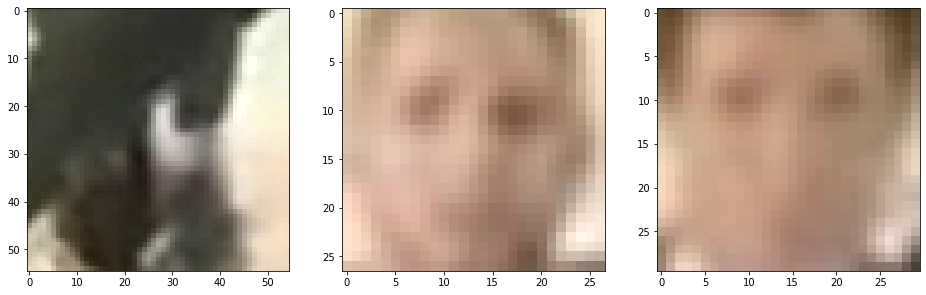

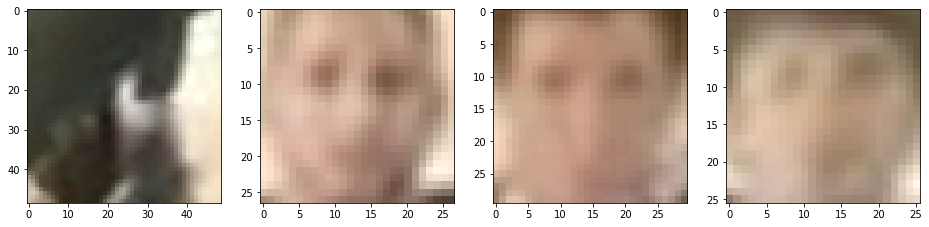

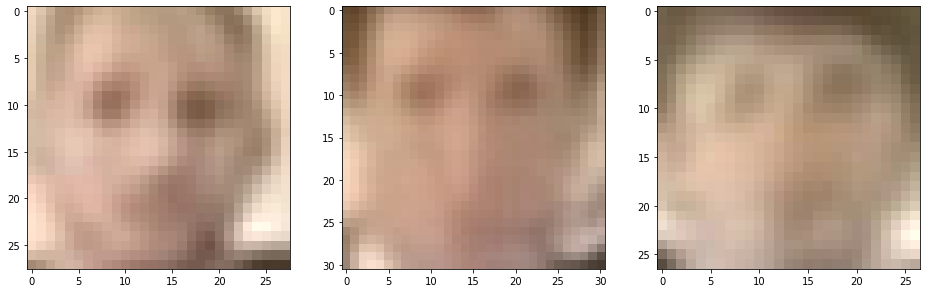

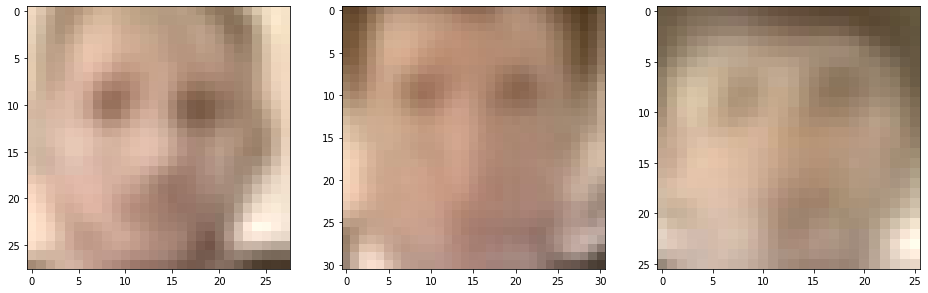

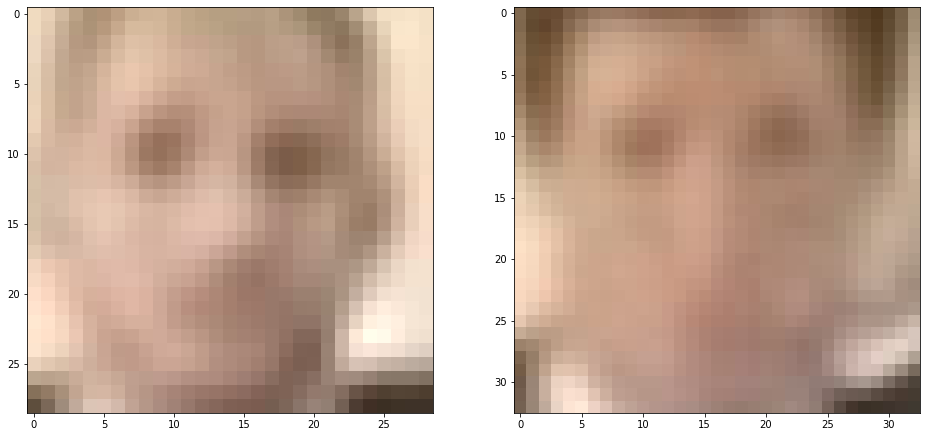

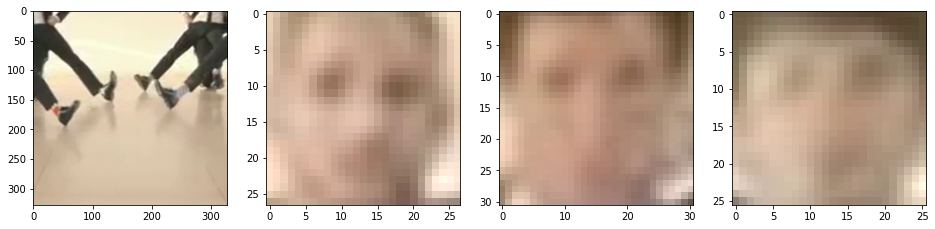

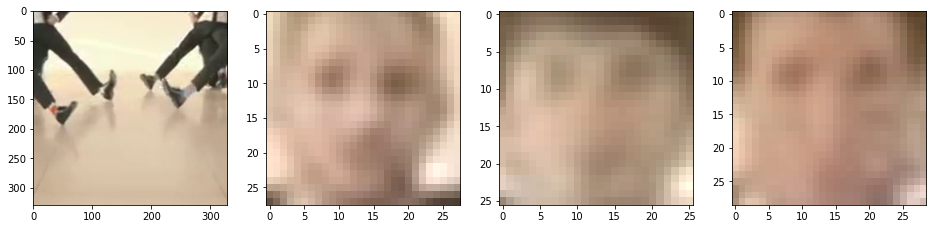

In [18]:
frame_width,frame_height = 720, 1280
out = cv2.VideoWriter('outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 20, (frame_height, frame_width))

# You have to define a function detect_faces(frame) that takes a frame, does the processing and returns the output frame!
process_video("vid.mp4", detect_faces)

out.release()